<a href="https://colab.research.google.com/github/myselfdk03/PINNs/blob/main/tfBH_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
import torch.optim.lr_scheduler as lr_scheduler


In [ ]:
# class PINN(nn.Module):
#     def __init__(self, input_dim=2, hidden_dim=100, output_dim=1, num_layers=4):
#         super(PINN, self).__init__()
#         layers = [nn.Linear(input_dim, hidden_dim), nn.Tanh()]
#         for _ in range(num_layers - 1):
#             layers.append(nn.Linear(hidden_dim, hidden_dim))
#             layers.append(nn.Tanh())
#         layers.append(nn.Linear(hidden_dim, output_dim))
#         self.network = nn.Sequential(*layers)

#     def forward(self, x):
#         return self.network(x)

# def Du(x,t, u_grad):
#   dt = t[1] - t[0]  # Time step
#   integrand = u_grad * dt
#   integral = torch.trapz(integrand, dx=dt.item())
#   fractional_derivative = (1 / torch.tensor(gamma(1 - alpha))) * integral
#   return fractional_derivative



# # PDE residuala
# def pde_residual(x, t, model, alpha):
#     x.requires_grad = True
#     t.requires_grad = True
#     inputs = torch.cat((x, t), dim=1)
#     u = model(inputs)

#     u_x = torch.autograd.grad(u, x, torch.ones_like(u), create_graph=True)[0]
#     u_xx = torch.autograd.grad(u_x, x, torch.ones_like(u), create_graph=True)[0]
#     u_t = torch.autograd.grad(u, t, torch.ones_like(u), create_graph=True)[0]

#     frac_deriv = Du(t, u_t, alpha)
#     source_term = (
#         6 * torch.sin(5 * np.pi * x / 6) * t**(3 - alpha) / gamma(4 - alpha) +
#         0.01 * t**6 * (5 * np.pi / 6) * torch.cos(5 * np.pi * x / 6) * torch.sin(5 * np.pi * x / 6) +
#         (5 * np.pi / 6)**2 * t**3 * torch.sin(5 * np.pi * x / 6) -
#         t**3 * torch.sin(5 * np.pi * x / 6) * (1 - t**3 * torch.sin(5 * np.pi * x / 6)) *
#         (t**3 * torch.sin(5 * np.pi * x / 6) - 0.5)
#     )
#     residual = frac_deriv - u_xx + 0.01 * u * u_x - u * (1 - u) * (u - 0.5) - source_term
#     return torch.mean(residual**2)

# # Loss function
# def loss_function(model, x, t, alpha):
#     # Initial condition
#     u_initial = model(torch.cat((x, torch.zeros_like(x)), dim=1))
#     loss_ic = torch.mean(u_initial**2)

#     # Boundary conditions
#     u_x0 = model(torch.cat((torch.zeros_like(t), t), dim=1))
#     u_x1 = model(torch.cat((torch.ones_like(t), t), dim=1))
#     loss_bc = torch.mean(u_x0**2 + (u_x1 - t**3 / 2)**2)

#     # PDE residual
#     loss_pde = pde_residual(x, t, model, alpha)
#     return loss_ic + loss_bc + loss_pde


# alpha = 0.3
# x = torch.linspace(0, 1, 100).view(-1, 1)
# t = torch.linspace(0, 1, 100).view(-1, 1)
# model = PINN()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# # Define a scheduler (StepLR in this case)
# scheduler = lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.5)

# epochs = 20000
# losses = []

# for epoch in range(epochs):
#     optimizer.zero_grad()
#     loss = loss_function(model, x, t, alpha)
#     loss.backward()
#     optimizer.step()
#     scheduler.step()  # Update learning rate based on the scheduler

#     losses.append(loss.item())
#     if (epoch + 1) % 1000 == 0:
#         print(f"Epoch {epoch + 1}, Loss: {loss.item():.6e}, LR: {scheduler.get_last_lr()[0]:.1e}")

# # Plot loss
# import matplotlib.pyplot as plt
# plt.plot(range(epochs), losses)
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Loss Convergence with Learning Rate Scheduler')
# plt.yscale('log')
# plt.grid(True)
# plt.show()

# x_test = torch.linspace(0, 1, 100).view(-1, 1)
# t_test = torch.linspace(0, 1, 100).view(-1, 1)
# inputs_test = torch.cat((x_test, t_test), dim=1)
# predictions = model(inputs_test).detach().numpy()
# exact_solution = (t_test**3 * torch.sin(5 * np.pi * x_test / 6)).numpy()
# print(f"exact solution: {exact_solution}")
# print(f"predicted solution: {predictions}")

# plt.figure(figsize=(10, 6))
# plt.plot(x_test.numpy(), predictions, label="Predicted Solution", linestyle='--')
# plt.plot(x_test.numpy(), exact_solution, label="Exact Solution")
# plt.xlabel("x")
# plt.ylabel("u(x,t)")
# plt.legend()
# plt.title("Comparison of Predicted and Exact Solutions")
# plt.show()

# lbfgs_optimizer = torch.optim.LBFGS(model.parameters(), lr=0.1, max_iter=500, history_size=10)

# for i in range(2000):
#     lbfgs_optimizer.zero_grad()
#     loss = loss_function(model, x, t, alpha)
#     loss.backward()
#     lbfgs_optimizer.step(lambda: loss)

# # Generate meshgrid for 3D plot
# x_test = torch.linspace(0, 1, 100).view(-1, 1)
# t_test = torch.linspace(0, 1, 100).view(-1, 1)
# X, T = torch.meshgrid(x_test.squeeze(), t_test.squeeze(), indexing='ij')
# inputs_test = torch.cat((X.flatten().view(-1, 1), T.flatten().view(-1, 1)), dim=1)

# # Predict and reshape results
# predictions = model(inputs_test).detach().numpy().reshape(100, 100)
# exact_solution = (T**3 * torch.sin(5 * np.pi * X / 6)).numpy()

# # 3D Plot: Predicted solution
# fig = plt.figure(figsize=(12, 6))

# ax1 = fig.add_subplot(122, projection='3d')
# ax1.plot_surface(X.numpy(), T.numpy(), predictions, cmap='viridis')
# ax1.set_title('Predicted Solution')
# ax1.set_xlabel('x')
# ax1.set_ylabel('t')
# ax1.set_zlabel('u(x, t)')

# ax2 = fig.add_subplot(121, projection='3d')
# ax2.plot_surface(X.numpy(), T.numpy(), exact_solution, cmap='viridis')
# ax2.set_title('Exact Solution')
# ax2.set_xlabel('x')
# ax2.set_ylabel('t')
# ax2.set_zlabel('u(x, t)')

# plt.tight_layout()
# plt.show()

# from tabulate import tabulate
# import pandas as pd

# # Generate specific test points
# x_values = torch.arange(0.1, 1.1, 0.1).view(-1, 1)
# t_values = torch.tensor([0.2, 0.5, 0.8]).view(-1, 1)

# # Prepare table data
# table_data = []

# for t in t_values:
#     t_repeat = t.repeat(x_values.shape[0], 1)
#     inputs = torch.cat((x_values, t_repeat), dim=1)

#     # Predict using the model
#     predictions = model(inputs).detach().numpy().flatten()

#     # Calculate exact solution
#     exact = (t**3 * torch.sin(5 * np.pi * x_values / 6)).numpy().flatten()

#     # Append to table data
#     for x, pred, ex in zip(x_values.numpy().flatten(), predictions, exact):
#         table_data.append([f"{t.item():.2f}", f"{x:.2f}", f"{pred:.6f}", f"{ex:.6f}", f"{abs(pred - ex):.6f}"])

# # Convert to DataFrame and print as a formatted table
# headers = ["t", "x", "Predicted", "Exact", "Error"]
# print(tabulate(table_data, headers=headers, tablefmt="grid"))



In [ ]:
# x_values = torch.arange(0.0, 1.1, 0.1).view(-1, 1)
# t_values = torch.full_like(x_values,0.0).view(-1, 1)


# # t_repeat = t.repeat(x_values.shape[0], 1)
# inputs = torch.cat((x_values, t_values), dim=1)
# p = model(inputs).detach().numpy().flatten()
# e = (t_values**3 * torch.sin(5 * np.pi * x_values / 6)).numpy().flatten()
# print(p,e)

In [ ]:
# x_values = torch.arange(0.0, 1.1, 0.1).view(-1, 1)
# t_values = torch.full_like(x_values,1.0).view(-1, 1)


# # t_repeat = t.repeat(x_values.shape[0], 1)
# inputs = torch.cat((x_values, t_values), dim=1)
# p = model(inputs).detach().numpy().flatten()
# e = (t_values**3 * torch.sin(5 * np.pi * x_values / 6)).numpy().flatten()
# print(p,e)

In [ ]:
import torch

import torch.nn as nn
import numpy as np
import torch.optim.lr_scheduler as lr_scheduler
from scipy.special import gamma
import matplotlib.pyplot as plt

# Define the function u(x, t)
def u(x, t):
    x1=0.5
    return (t**3) * np.sin(5 * np.pi * x1 / 6)

# Define the fractional derivative using L1 approximation
def Du(x, t, alpha):
    x1=0.5
    n = len(t)
    tau = t[1] - t[0]
    df = np.zeros(n,n)

    # Precompute L1 coefficients
    l = np.zeros(n)
    for k in range(n):
        l[k] = (k + 1)**(1 - alpha) - k**(1 - alpha)

    # Calculate the fractional derivative at each time step
    for j in range(1,n-1):
        for i in range(1, n):  # Start from the second time step
            term1 = l[0] * u(x1, t[i])
            term2 = sum((l[i - k - 1] - l[i - k]) * u(x1, t[k]) for k in range(1, i))
            term3 = l[i - 1] * u(x1, t[0])
            df[j,i] = (tau**(-alpha) / gamma(2 - alpha)) * (term1 - term2 - term3)
    return df



# PDE residual calculation
def pde_residual(x, t, model, alpha):
    x.requires_grad = True
    t.requires_grad = True
    inputs = torch.cat((x, t), dim=1)
    u = model(inputs)

    u_x = torch.autograd.grad(u, x, torch.ones_like(u), create_graph=True)[0]
    u_xx = torch.autograd.grad(u_x, x, torch.ones_like(u), create_graph=True)[0]
    u_t = torch.autograd.grad(u, t, torch.ones_like(u), create_graph=True)[0]

    frac_deriv = Du(x, t, alpha)
    source_term = (
        6 * torch.sin(5 * np.pi * x / 6) * t**(3 - alpha) / gamma(4 - alpha) +
        0.01 * t**6 * (5 * np.pi / 6) * torch.cos(5 * np.pi * x / 6) * torch.sin(5 * np.pi * x / 6) +
        (5 * np.pi / 6)**2 * t**3 * torch.sin(5 * np.pi * x / 6) -
        t**3 * torch.sin(5 * np.pi * x / 6) * (1 - t**3 * torch.sin(5 * np.pi * x / 6)) *
        (t**3 * torch.sin(5 * np.pi * x / 6) - 0.5)
    )
    residual = frac_deriv - u_xx + 0.01 * u * u_x - u * (1 - u) * (u - 0.5) - source_term
    return torch.mean(residual**2)

# Loss function
def loss_function(model, x, t, alpha):
    # Initial condition
    u_initial = model(torch.cat((x, torch.zeros_like(x)), dim=1))
    loss_ic = torch.mean(u_initial**2)

    # Boundary conditions at t=0 and t=1
    u_x0 = model(torch.cat((torch.zeros_like(t), t), dim=1))  # Boundary at t = 0
    u_x1 = model(torch.cat((torch.ones_like(t), t), dim=1))  # Boundary at t = 1
    loss_bc = torch.mean(u_x0**2 + (u_x1 - t**3 / 2)**2)

    # PDE residual
    loss_pde = pde_residual(x, t, model, alpha)
    return loss_pde+loss_bc+loss_ic

# Set up training parameters


alpha = 0.3
epochs = 1000
n_units = 16
n_layers = 1
N = 1000
# x = torch.linspace(0, 1, N).view(-1, 1)
x=torch.linspace(0, 1, N).view(-1, 1)
t = torch.linspace(0, 1, N).view(-1, 1)

# Define the PINN model class
class PINN(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=n_units, output_dim=1, num_layers=n_layers):
        super(PINN, self).__init__()
        layers = [nn.Linear(input_dim, hidden_dim), nn.Tanh()]
        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.Tanh())
        layers.append(nn.Linear(hidden_dim, output_dim))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)
model = PINN()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Using LBFGS Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Define a scheduler (StepLR in this case)
# scheduler = lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.5)
losses = []
for epoch in range(epochs):
    # def closure():
    loss = loss_function(model, x, t, alpha)
    # loss = pde_loss + bc_loss + ic_loss
    optimizer.zero_grad()

    loss.backward()
        # return loss
    optimizer.step()
    # loss = closure()
    losses.append(loss.item())
    if (not epoch%50) or (epoch == epochs-1):
      print(f"Epoch {epoch + 1}, Loss: {loss.item()}")




Epoch 1, Loss: 404635.0
Epoch 51, Loss: 404553.4375
Epoch 101, Loss: 404428.625
Epoch 151, Loss: 404207.4375
Epoch 201, Loss: 403859.53125
Epoch 251, Loss: 403354.03125
Epoch 301, Loss: 402653.125
Epoch 351, Loss: 401702.21875
Epoch 401, Loss: 372159.78125
Epoch 451, Loss: 274196.125
Epoch 501, Loss: 266700.375
Epoch 551, Loss: 264396.21875
Epoch 601, Loss: 262648.375
Epoch 651, Loss: 261430.609375
Epoch 701, Loss: 260672.21875
Epoch 751, Loss: 260252.890625
Epoch 801, Loss: 260042.140625
Epoch 851, Loss: 259938.046875
Epoch 901, Loss: 259880.3125
Epoch 951, Loss: 259840.390625
Epoch 1000, Loss: 259807.9375


In [ ]:
# # 2D Heatmap Plot: Predicted solution
# plt.figure(figsize=(8, 6))
# plt.contourf(X.numpy(), T.numpy(), predictions, cmap='viridis', levels=100)
# plt.colorbar(label='u(x, t)')
# plt.title('Predicted Solution Heatmap')
# plt.xlabel('x')
# plt.ylabel('t')
# plt.show()

# # Compute the relative L2 error
# l2_error = torch.norm(torch.tensor(predictions) - torch.tensor(exact_solution)) / torch.norm(torch.tensor(exact_solution))
# print(f"Relative L2 Error: {l2_error.item()}")

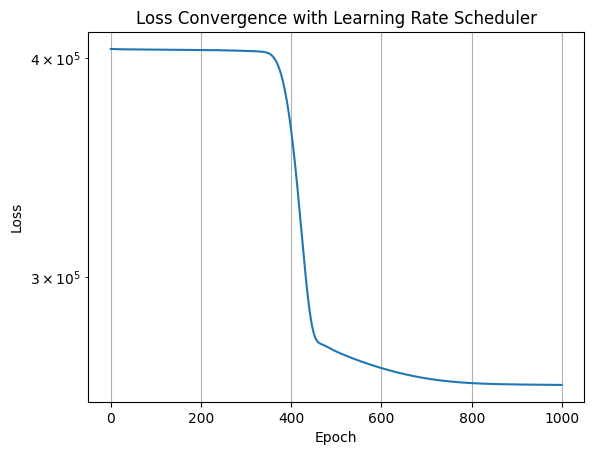

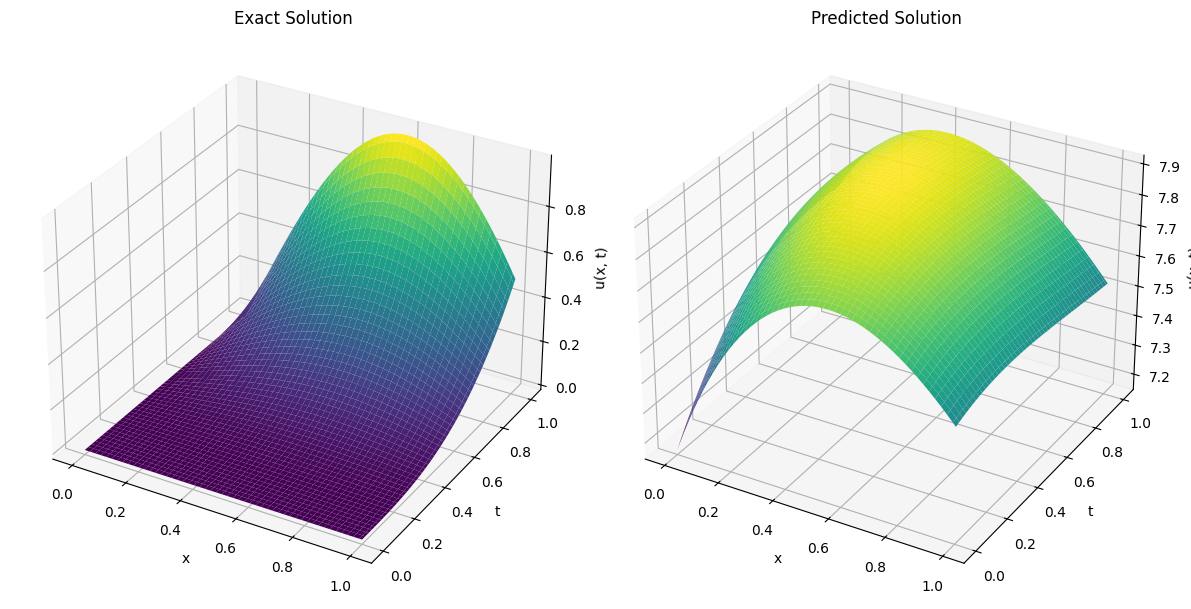

+-----+-----+-------------+----------+---------+
|   t |   x |   Predicted |    Exact |   Error |
+=====+=====+=============+==========+=========+
| 0.2 | 0.1 |     7.55093 | 0.002071 | 7.54885 |
+-----+-----+-------------+----------+---------+
| 0.2 | 0.2 |     7.69104 | 0.004    | 7.68704 |
+-----+-----+-------------+----------+---------+
| 0.2 | 0.3 |     7.78525 | 0.005657 | 7.7796  |
+-----+-----+-------------+----------+---------+
| 0.2 | 0.4 |     7.83934 | 0.006928 | 7.83241 |
+-----+-----+-------------+----------+---------+
| 0.2 | 0.5 |     7.85832 | 0.007727 | 7.85059 |
+-----+-----+-------------+----------+---------+
| 0.2 | 0.6 |     7.84649 | 0.008    | 7.83849 |
+-----+-----+-------------+----------+---------+
| 0.2 | 0.7 |     7.80755 | 0.007727 | 7.79983 |
+-----+-----+-------------+----------+---------+
| 0.2 | 0.8 |     7.74479 | 0.006928 | 7.73786 |
+-----+-----+-------------+----------+---------+
| 0.2 | 0.9 |     7.66128 | 0.005657 | 7.65563 |
+-----+-----+-------

In [ ]:
# Plot loss
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Convergence with Learning Rate Scheduler')
plt.yscale('log')
plt.grid(True)
plt.show()

import torch
import torch.nn as nn
import numpy as np
import torch.optim.lr_scheduler as lr_scheduler
from scipy.special import gamma
import matplotlib.pyplot as plt
from tabulate import tabulate
import pandas as pd
# 3D Plot: Predicted solution vs Exact solution
x_test = torch.linspace(0, 1, 100).view(-1, 1)
t_test = torch.linspace(0, 1, 100).view(-1, 1)
X, T = torch.meshgrid(x_test.squeeze(), t_test.squeeze(), indexing='ij')
inputs_test = torch.cat((X.flatten().view(-1, 1), T.flatten().view(-1, 1)), dim=1)

# Predict and reshape results
predictions = model(inputs_test).detach().numpy().reshape(100, 100)
exact_solution = (T**3 * torch.sin(5 * np.pi * X / 6)).numpy()

# 3D Plot: Predicted solution
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(122, projection='3d')
ax1.plot_surface(X.numpy(), T.numpy(), predictions, cmap='viridis')
ax1.set_title('Predicted Solution')
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('u(x, t)')

ax2 = fig.add_subplot(121, projection='3d')
ax2.plot_surface(X.numpy(), T.numpy(), exact_solution, cmap='viridis')
ax2.set_title('Exact Solution')
ax2.set_xlabel('x')
ax2.set_ylabel('t')
ax2.set_zlabel('u(x, t)')

plt.tight_layout()
plt.show()

# Generate specific test points
x_values = torch.arange(0.1, 1.1, 0.1).view(-1, 1)
t_values = torch.tensor([0.2, 0.5, 0.8]).view(-1, 1)

# Prepare table data
table_data = []

for t in t_values:
    t_repeat = t.repeat(x_values.shape[0], 1)
    inputs = torch.cat((x_values, t_repeat), dim=1)

    # Predict using the model
    predictions = model(inputs).detach().numpy().flatten()

    # Calculate exact solution
    exact = (t**3 * torch.sin(5 * np.pi * x_values / 6)).numpy().flatten()

    # Append to table data
    for x, pred, ex in zip(x_values.numpy().flatten(), predictions, exact):
        table_data.append([f"{t.item():.2f}", f"{x:.2f}", f"{pred:.6f}", f"{ex:.6f}", f"{abs(pred - ex):.6f}"])

# Convert to DataFrame and print as a formatted table
headers = ["t", "x", "Predicted", "Exact", "Error"]
print(tabulate(table_data, headers=headers, tablefmt="grid"))

# Evaluate for t=0
x_values = torch.arange(0.0, 1.1, 0.1).view(-1, 1)
t_values = torch.full_like(x_values, 0.0).view(-1, 1)

inputs = torch.cat((x_values, t_values), dim=1)
p = model(inputs).detach().numpy().flatten()
e = (t_values**3 * torch.sin(5 * np.pi * x_values / 6)).numpy().flatten()
print("Predicted at t=0:", p)
print("Exact at t=0:", e)

Epoch 0, Loss: 0.13105766475200653
Epoch 100, Loss: 0.00022949151752982289
Epoch 200, Loss: 3.6966954212402925e-05
Epoch 300, Loss: 1.1565663044166286e-05
Epoch 400, Loss: 6.522549483634066e-06
Epoch 500, Loss: 4.618917500920361e-06
Epoch 600, Loss: 3.471691115919384e-06
Epoch 700, Loss: 2.6299969704268733e-06
Epoch 800, Loss: 1.8310898894924321e-06
Epoch 900, Loss: 1.9770684502873337e-06
Epoch 1000, Loss: 1.014052259051823e-06
Epoch 1100, Loss: 7.35697483378317e-07
Epoch 1200, Loss: 1.8448689615979674e-06
Epoch 1300, Loss: 2.7058447358285775e-06
Epoch 1400, Loss: 2.2061878553358838e-05
Epoch 1500, Loss: 4.4544506749844004e-07
Epoch 1600, Loss: 8.394624160246167e-07
Epoch 1700, Loss: 2.393014801782556e-05
Epoch 1800, Loss: 3.8435513260992593e-07
Epoch 1900, Loss: 1.0511377013244783e-06
Epoch 2000, Loss: 2.6032794266939163e-06
Epoch 2100, Loss: 5.182983386475826e-06
Epoch 2200, Loss: 4.1143036355606455e-07
Epoch 2300, Loss: 1.3260127161629498e-05
Epoch 2400, Loss: 3.195153226442926e-07


<ipython-input-13-d0311474db4d>:95: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("deeponet_example_4_1.pth"))


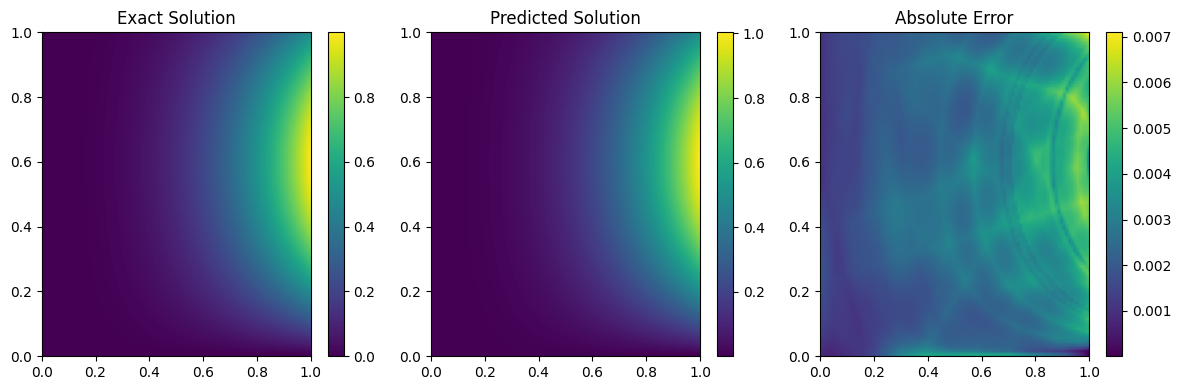

<ipython-input-13-d0311474db4d>:127: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("deeponet_example_4_1.pth"))


           t         x     Exact  Predicted     Error
0   0.191919  0.090909  0.001667   0.003003  0.001337
1   0.191919  0.191919  0.003404   0.004921  0.001517
2   0.191919  0.292929  0.004905   0.006785  0.001880
3   0.191919  0.393939  0.006065   0.008174  0.002109
4   0.191919  0.494949  0.006803   0.008935  0.002132
5   0.191919  0.595960  0.007069   0.009065  0.001996
6   0.191919  0.696970  0.006842   0.008827  0.001984
7   0.191919  0.797980  0.006141   0.008124  0.001984
8   0.191919  0.898990  0.005012   0.006948  0.001936
9   0.191919  1.000000  0.003534   0.005311  0.001776
10  0.494949  0.090909  0.028586   0.030668  0.002082
11  0.494949  0.191919  0.058390   0.060812  0.002422
12  0.494949  0.292929  0.084135   0.087003  0.002867
13  0.494949  0.393939  0.104031   0.106759  0.002728
14  0.494949  0.494949  0.116694   0.119475  0.002781
15  0.494949  0.595960  0.121243   0.123838  0.002595
16  0.494949  0.696970  0.117364   0.119592  0.002228
17  0.494949  0.797980  0.10

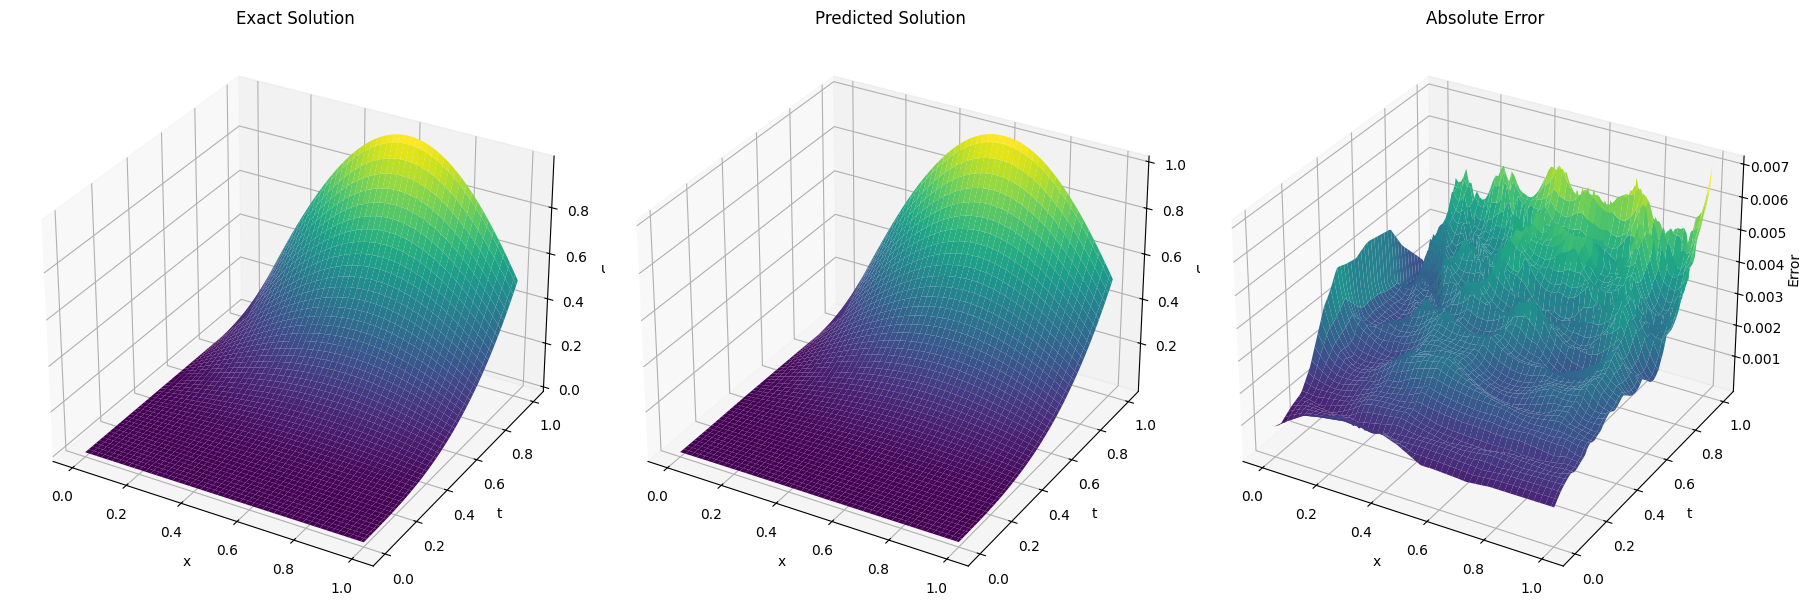

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the branch and trunk networks for DeepONet
class BranchNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(BranchNet, self).__init__()
        layers = [nn.Linear(input_dim, hidden_dim), nn.ReLU()]
        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_dim, output_dim))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

class TrunkNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(TrunkNet, self).__init__()
        layers = [nn.Linear(input_dim, hidden_dim), nn.ReLU()]
        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_dim, output_dim))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

class DeepONet(nn.Module):
    def __init__(self, branch_net, trunk_net):
        super(DeepONet, self).__init__()
        self.branch_net = branch_net
        self.trunk_net = trunk_net

    def forward(self, branch_input, trunk_input):
        branch_output = self.branch_net(branch_input)
        trunk_output = self.trunk_net(trunk_input)
        return torch.sum(branch_output * trunk_output, dim=1, keepdim=True)

# Loss function for DeepONet
def compute_loss_deeponet(model, branch_input, trunk_input, true_output):
    pred_output = model(branch_input, trunk_input)
    loss = torch.mean((pred_output - true_output) ** 2)
    return loss

# Training the model using DeepONet
if __name__ == "__main__":
    # Hyperparameters
    branch_input_dim = 1  # Number of sensors or sampled points
    trunk_input_dim = 2  # (x, t)
    hidden_dim = 50
    output_dim = 100
    num_layers = 4
    learning_rate = 1e-3
    epochs = 5000

    # Create branch and trunk networks
    branch_net = BranchNet(branch_input_dim, hidden_dim, output_dim, num_layers)
    trunk_net = TrunkNet(trunk_input_dim, hidden_dim, output_dim, num_layers)
    model = DeepONet(branch_net, trunk_net)

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Define training data
    x = torch.linspace(0, 1, 100).view(-1, 1)
    t = torch.linspace(0, 1, 100).view(-1, 1)
    alpha = 0.3

    x_grid, t_grid = torch.meshgrid(x.squeeze(), t.squeeze(), indexing="ij")
    x_train = x_grid.flatten().view(-1, 1)
    t_train = t_grid.flatten().view(-1, 1)
    u_train = (t_train ** 3) * torch.sin((5 * np.pi / 6) * x_train)

    branch_input = u_train.view(-1, branch_input_dim)
    trunk_input = torch.cat((x_train, t_train), dim=1)

    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = compute_loss_deeponet(model, branch_input, trunk_input, u_train)
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

    # Save the trained model
    torch.save(model.state_dict(), "deeponet_example_4_1.pth")

    # Load the model for comparison
    model.load_state_dict(torch.load("deeponet_example_4_1.pth"))
    model.eval()

    # Generate predictions
    with torch.no_grad():
        pred_u = model(branch_input, trunk_input).view(100, 100)

    exact_u = (t_grid ** 3) * torch.sin((5 * np.pi / 6) * x_grid)

    # Compute error
    error = torch.abs(pred_u - exact_u)

    # Plot comparison
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title("Exact Solution")
    plt.imshow(exact_u.numpy(), extent=[0, 1, 0, 1], origin='lower', aspect='auto', cmap='viridis')
    plt.colorbar()

    plt.subplot(1, 3, 2)
    plt.title("Predicted Solution")
    plt.imshow(pred_u.numpy(), extent=[0, 1, 0, 1], origin='lower', aspect='auto', cmap='viridis')
    plt.colorbar()

    plt.subplot(1, 3, 3)
    plt.title("Absolute Error")
    plt.imshow(error.numpy(), extent=[0, 1, 0, 1], origin='lower', aspect='auto', cmap='viridis')
    plt.colorbar()

    plt.tight_layout()
    plt.show()

    model.load_state_dict(torch.load("deeponet_example_4_1.pth"))
    model.eval()

    # Generate predictions
    with torch.no_grad():
        pred_u = model(branch_input, trunk_input).view(100, 100)

    exact_u = (t_grid ** 3) * torch.sin((5 * np.pi / 6) * x_grid)

    # Compute error
    error = torch.abs(pred_u - exact_u)

    # Extract values at t = 0.2, 0.5, 0.8 and x = 0.1 to 1.0
    selected_t_indices = [int(0.2 * 100), int(0.5 * 100), int(0.8 * 100)]
    selected_x_indices = [int(i * 100) for i in np.arange(0.1, 1.1, 0.1)]

    rows = []
    for t_idx in selected_t_indices:
        for x_idx in selected_x_indices:
            rows.append({
                "t": t[t_idx-1].item(),
                "x": x[x_idx-1].item(),
                "Exact": exact_u[x_idx-1, t_idx-1].item(),
                "Predicted": pred_u[x_idx-1, t_idx-1].item(),
                "Error": error[x_idx-1, t_idx-1].item(),
            })

    df = pd.DataFrame(rows)
    print(df)

    # Save the table to a CSV file
    df.to_csv("deeponet_results.csv", index=False)

    # Plot 3D graph
    fig = plt.figure(figsize=(18, 6))

    ax1 = fig.add_subplot(131, projection='3d')
    ax1.set_title("Exact Solution")
    ax1.plot_surface(x_grid.numpy(), t_grid.numpy(), exact_u.numpy(), cmap='viridis')
    ax1.set_xlabel("x")
    ax1.set_ylabel("t")
    ax1.set_zlabel("u")

    ax2 = fig.add_subplot(132, projection='3d')
    ax2.set_title("Predicted Solution")
    ax2.plot_surface(x_grid.numpy(), t_grid.numpy(), pred_u.numpy(), cmap='viridis')
    ax2.set_xlabel("x")
    ax2.set_ylabel("t")
    ax2.set_zlabel("u")

    ax3 = fig.add_subplot(133, projection='3d')
    ax3.set_title("Absolute Error")
    ax3.plot_surface(x_grid.numpy(), t_grid.numpy(), error.numpy(), cmap='viridis')
    ax3.set_xlabel("x")
    ax3.set_ylabel("t")
    ax3.set_zlabel("Error")

    plt.tight_layout()
    plt.show()





In [ ]:
import pandas as pd
    # Extract values at t = 0.2, 0.5, 0.8 and x = 0.1 to 1.0
selected_t_indices = [int(0.2 * 100), int(0.5 * 100), int(0.8 * 100)]
selected_x_indices = [int(i * 100) for i in np.arange(0.1, 1.1, 0.1)]

rows = []
for t_idx in selected_t_indices:
    for x_idx in selected_x_indices:
            rows.append({
                "t": t[t_idx].item(),
                "x": x[x_idx].item(),
                "Exact": exact_u[x_idx, t_idx].item(),
                "Predicted": pred_u[x_idx, t_idx].item(),
                "Error": error[x_idx, t_idx].item(),
            })

    df = pd.DataFrame(rows)
    print(df)

    # Save the table to a CSV file
    df.to_csv("deeponet_results.csv", index=False)

IndexError: index 100 is out of bounds for dimension 0 with size 100